### Background
In this problem we’ll investigate these methodologies collecting data to estimate the parameters of a linear trend.
Specifically, we’ll first assume that we have a true underlying linear model that governs our data, for all $x_i \in [0, 1]$: 
<div align = "center"> $y_i = ax_i + b + \epsilon_i$
    </div>
Where $\epsilon_i \sim N(0,\sigma^2)$ is the observation noise, and $a, b$ are the true parameters of the
model. We are interested in designing $n$ query points $x_i$, such that the $(x_i, y_i)$ pairs we
receive will result in the best estimates of $a$ and $b$. We’ll use least squares to do this.

We’ll compare three different designs for $x$:
- **Evenly spaced**: query n points evenly spaced within [0, 1] (inclusive).
- **Dumbbell**: query half of the allotted points at $x_i = 0$, the other half at $x_i = 1$.
- **Quadratic**: query one third of the allotted points at $x_i = 0$, the one third at $x_i = 1$, and one third at the halfway point: $x_i = 0.5$.

Once we’ve designed $\{x_i\}_{i=1}^{n}$ and conducted our experiment, we have pairs $\{(x_i, y_i)\}_{i
=1}^{n}$.
We will use OLS to estimate $a$. Recall that for the univariate regression above, the OLS
estimators of $a$ is: 
<div align = "center"> $\hat a_{OLS} = \frac{\sum_{i=1}^{n}(x_i - \bar x)(y_i - \bar y)}{\sum_{i=1}^{n}(x_i-\bar x)^2}$
    </div>
and has variance 
<div align = "center"> $Var(\hat a_{OLS}) = \frac{\sigma^2}{\sum_{i=1}^{n}(x_i - \bar x)^2}$
    </div>
where $\bar x = \frac{1}{n}\sum_{i=1}^{n}x_i$

In [17]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import datasets, linear_model
import statistics as stat

### Some Theoretical Proof

- The variance of the **dumbbell estimator** for this problem is
<div align = "center"> $Var(\hat \alpha_{db}) = \frac{4\sigma^2}{n}$
    </div>
    
    Proof: $Var(\hat \alpha_{db}) = \frac{\sigma^2}{\sum_{i=1}^{n}(x_i-\bar x)^2} = \frac{\sigma^2}{\sum_{i=1}^{n}(x_i - 0.5)^2} = \frac{\sigma^2}{n*0.5^2}= \frac{4\sigma^2}{n}$ <br/>
    since half of $x_i = 0$, and the other half of $x_i = 1$

- The variance of the estimator resulting from a **quadratic design** on this 
<div align = "center"> $Var(\hat \alpha_{qu}) = \frac{3}{2}Var(\hat \alpha_{db})$
    </div>
    
    Proof: $Var(\hat \alpha_{qu}) = \frac{\sigma^2}{\sum_{i=1}^{n}(x_i-\bar x)^2} = \frac{\sigma^2}{\frac{n}{3}(0-0.5)^2 + \frac{n}{3}(0.5-0.5)^2 + \frac{n}{3}(1-0.5)^2} = \frac{\sigma^2}{\frac{2}{3}n*0.5^2} = \frac{3}{2}Var(\hat \alpha_{db})$ <br/>
    since one third of the allotted points at $x_i = 0$, the one third at $x_i = 1$, and one third at the halfway point: $x_i = 0.5$.

- The variance of the estimator resulting from a **evenly spaced** on this 
<div align = "center"> $Var(\hat \alpha_{even}) = \frac{3(n-1)}{n+1}Var(\hat \alpha_{db})$
    </div>
    
    Proof: $Var(\hat \alpha_{even}) = \frac{\sigma^2}{\sum_{i=1}^{n}(x_i-\bar x)^2} = \frac{\sigma^2}{\sum_{i=1}^{n}(\frac{i-1}{n-1} - \frac{1}{2})^2} = \frac{\sigma^2}{\frac{n(n+1)}{12(n-1)}} = \frac{3(n-1)}{n+1} \frac{4\sigma^2}{n} = \frac{3(n-1)}{n+1}Var(\hat \alpha_{db})$ <br/>
    

### Simulations I
Implement the following experiment to assess these three design methodologies;
1. For n = 100, instantiate three design vectors $x = x_1, . . . ,x_n$ corresponding to
the designs above.
2. For $x_1, . . . ,x_n$ in each of the three samples, sample from the “true” model:
<div align = "center"> $y_i = ax_i + \epsilon_i$
    </div>
where $a = 5$ and $\epsilon_i = N(0, 0.5)$.
3. Use these three sets of 100 $(x, y)$ pairs to compute three OLS estimates of $\alpha$.
4. Make three scatter plots of $y$ vs. $x$, one for each experiment. On these plots overlay the fitted trendline using the OLS estimate of $\alpha$.

alpha_hat =  4.900966311566493


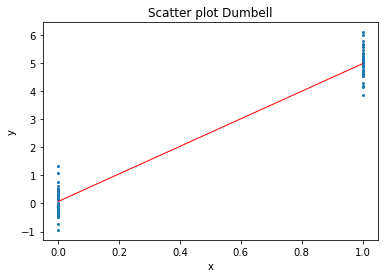

In [16]:
### dumbell
x_1 = np.zeros(50)
x_2 = np.ones(50)
x = np.concatenate((x_1, x_2), axis=0)
e = np.random.normal(0, 0.5, 100)
y = 5*x+e

regr = linear_model.LinearRegression()
regr.fit(x.reshape((100,1)), y)
y_fitted = regr.predict(x.reshape((100,1)))
print("alpha_hat = ",regr.coef_[0])

plt.scatter(x, y, s = 4)
plt.plot(x, y_fitted, color='red', linewidth=1)
plt.title('Scatter plot Dumbell')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

alpha_hat =  4.900468900257774


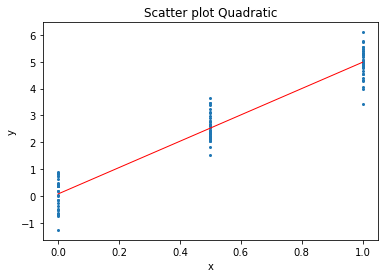

In [20]:
### quadratic
x_1 = np.zeros(33)
x_2 = np.array([0.5]*34)
x_3 = np.ones(33)
x = np.concatenate((x_1, x_2), axis=0)
x = np.concatenate((x, x_3), axis=0)
e = np.random.normal(0, 0.5, 100)
y = 5*x+e

regr = linear_model.LinearRegression()
regr.fit(x.reshape((100,1)), y)
y_fitted = regr.predict(x.reshape((100,1)))
print("alpha_hat = ",regr.coef_[0])

plt.scatter(x, y, s = 4)
plt.plot(x, y_fitted, color='red', linewidth=1)
plt.title('Scatter plot Quadratic')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

alpha_hat =  4.9744845789712455


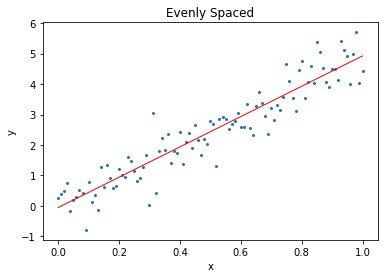

In [21]:
### even spaced
x = np.arange(101)/100
e = np.random.normal(0, 0.5, 101)
y = 5*x+e

regr = linear_model.LinearRegression()
regr.fit(x.reshape((101,1)), y)
y_fitted = regr.predict(x.reshape((101,1)))
print("alpha_hat = ",regr.coef_[0])

plt.scatter(x, y, s = 4)
plt.plot(x, y_fitted, color='red', linewidth=1)
plt.title('Evenly Spaced')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Distribution of $\hat \alpha$
Repeat the experiment above 1000 times (keep n fixed at 100), and record the distribution of OLS estimates of $\alpha$ for each of the three experiment designs. 

alpha_db mean: 4.991379196270868
alpha_db standard deviation: 0.09941396904142308


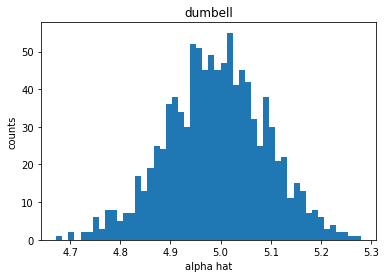

In [24]:
## Dumbell
dumbell_alpha = []
x_1 = np.zeros(50)
x_2 = np.ones(50)
x = np.concatenate((x_1, x_2), axis=0)
for i in range(1000):  
    e = np.random.normal(0, 0.5, 100)
    y = 5*x+e
    regr = linear_model.LinearRegression()
    regr.fit(x.reshape((100,1)), y)
    y_fitted = regr.predict(x.reshape((100,1)))
    dumbell_alpha.append(regr.coef_[0])
          
plt.hist(dumbell_alpha, bins = 50)
plt.ylabel("counts")
plt.xlabel("alpha hat")
plt.title("dumbell")
 
print("alpha_db mean:", stat.mean(dumbell_alpha))
print("alpha_db standard deviation:", stat.stdev(dumbell_alpha))


alpha_qu mean: 5.004650574110486
alpha_qu standard deviation: 0.12222889916990895


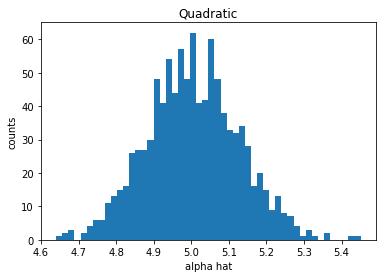

In [27]:
## quadratic
qua_alpha = []
x_1 = np.zeros(33)
x_2 = np.array([0.5]*34)
x_3 = np.ones(33)
x = np.concatenate((x_1, x_2), axis=0)
x = np.concatenate((x, x_3), axis=0)
for i in range(1000):  
    e = np.random.normal(0, 0.5, 100)
    y = 5*x+e
    regr = linear_model.LinearRegression()
    regr.fit(x.reshape((100,1)), y)
    y_fitted = regr.predict(x.reshape((100,1)))
    qua_alpha.append(regr.coef_[0])
          
plt.hist(qua_alpha, bins = 50)
plt.ylabel("counts")
plt.xlabel("alpha hat")
plt.title("Quadratic")

    
print("alpha_qu mean:", stat.mean(qua_alpha))
print("alpha_qu standard deviation:", stat.stdev(qua_alpha))

alpha_even mean: 5.000593302710162
alpha_even standard deviation: 0.16844102200278901


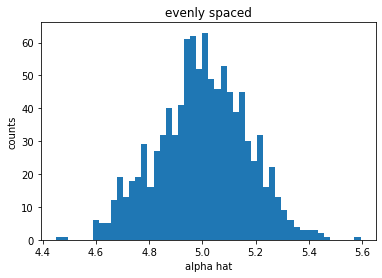

In [29]:
## evenly spaced
even_alpha = []
x = np.arange(101)/100
for i in range(1000):  
    e = np.random.normal(0, 0.5, 101)
    y = 5*x+e
    regr = linear_model.LinearRegression()
    regr.fit(x.reshape((101,1)), y)
    y_fitted = regr.predict(x.reshape((101,1)))
    even_alpha.append(regr.coef_[0])
          
plt.hist(even_alpha, bins = 50)
plt.ylabel("counts")
plt.xlabel("alpha hat")
plt.title("evenly spaced")

    
print("alpha_even mean:", stat.mean(even_alpha))
print("alpha_even standard deviation:",stat.stdev(even_alpha))


### Simulation II
What if we have a wrong assumption. Here's what we'll address in this part.<br/>
Now follow the same procedure as in Simulation I, but for a model which is not what expected, but rather is
<div align = "center "> $y_i = b(x_i − 0.5)^2 + \epsilon_i$
    </div>
where $b = 8$ and $\epsilon_i = N(0, 0.5)$. Run the same procedure to get the three OLS
estimates of $a$, and plot the scatter plots with trend line overlaid.

alpha_hat =  -0.201473985382379


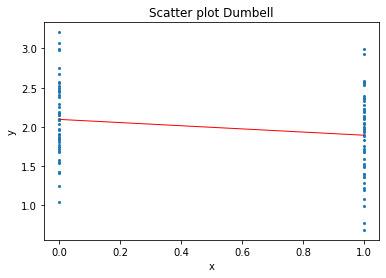

In [31]:
## Dumbell
x_1 = np.zeros(50)
x_2 = np.ones(50)
x = np.concatenate((x_1, x_2), axis=0)
e = np.random.normal(0, 0.5, 100)
y = 8*(x-0.5)**2+e


regr = linear_model.LinearRegression()
regr.fit(x.reshape((100,1)), y)
y_fitted = regr.predict(x.reshape((100,1)))
print("alpha_hat = ", regr.coef_[0])

plt.scatter(x, y, s = 4)
plt.plot(x, y_fitted, color='red', linewidth=1)
plt.title('Scatter plot Dumbell')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

alpha_hat =  0.026008972326431987


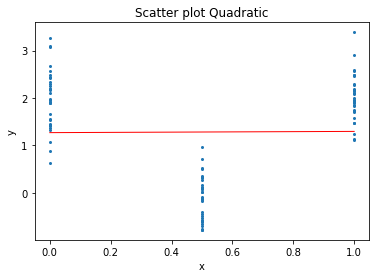

In [32]:
### quadratic
x_1 = np.zeros(33)
x_2 = np.array([0.5]*34)
x_3 = np.ones(33)
x = np.concatenate((x_1, x_2), axis=0)
x = np.concatenate((x, x_3), axis=0)
e = np.random.normal(0, 0.5, 100)
y = 8*(x-0.5)**2+e

regr = linear_model.LinearRegression()
regr.fit(x.reshape((100,1)), y)
y_fitted = regr.predict(x.reshape((100,1)))
print("alpha_hat = ", regr.coef_[0])

plt.scatter(x, y, s = 4)
plt.plot(x, y_fitted, color='red', linewidth=1)
plt.title('Scatter plot Quadratic')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

alpha_hat =  -0.03955155717727072


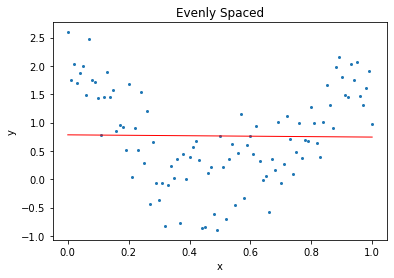

In [33]:
### even
x = np.arange(101)/100
e = np.random.normal(0, 0.5, 101)
y = 8*(x-0.5)**2+e


regr = linear_model.LinearRegression()
regr.fit(x.reshape((101,1)), y)
y_fitted = regr.predict(x.reshape((101,1)))
print("alpha_hat = ", regr.coef_[0])

plt.scatter(x, y, s = 4)
plt.plot(x, y_fitted, color='red', linewidth=1)
plt.title('Evenly Spaced')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Summary

- If I am absolutely certain the relationship between x and y is linear for $x \in [0, 1]$, I would use the “Dumbell” sampling strategy, since it’s giving the alpha estimate with smallest variance, aka giving the most stable unbiased estimate.
- If I am fairly certain the relationship is linear for x in this range, but it’s possible that it is also quadratic, I would use “Quadratic” strategy, since it gives relatively low variance while it samples the some point in between the endpoints as well.
- If I am really know the true relationship between x and y, but as a first exploratory step I’d model it as linear know nothing about the true relationship, I would use “Evenly Spaced” strategy, since it gives samples extensively from the range, though the variance is higher.